In [1]:
#Data Collection modules for additional clarity and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats 

# Load electricity prices data
df = pd.read_csv("C:\\Users\\rikua\\fmi_weather_and_price.csv")

df.head()

# Calculate descriptive statistics for the 'Temp' column
mean = np.mean(df['Temp']) # Calculates the mean/average of input value on data set
median = np.median(df['Temp'])# Calculates the median number on the data set
mode = stats.mode(df['Temp']) # The mode is the value that appears most frequently in a dataset.
std_deviation = np.std(df['Temp']) # Standard deviation is a measure of how spread out the numbers are

# Print the descriptive statistics
print("Temperature Mean:", mean)
print("Temperature Median:", median)
print("Temperature Mode:", mode) 
print("Temperature Standard deviation: ", std_deviation)

#space between for readability
print()

# Calculate descriptive statistics for the 'Wind' column
mean = np.mean(df['Wind'])
median = np.median(df['Wind'])
mode = stats.mode(df['Wind'])
std_deviation = np.std(df['Wind'])

print("Wind Mean:", mean)
print("Wind Median:", median)
print("Wind Mode:", mode) 
print("Wind Standard deviation:", std_deviation)

#space between for readability
print()

# Calculate descriptive statistics for the 'Price' column
mean = np.mean(df['Price'])
median = np.median(df['Price'])
mode = stats.mode(df['Price'])
std_deviation = np.std(df['Price'])

print("Price Mean:", mean)
print("Price Median:", median)
print("Price Mode:", mode) 
print("Price Standard deviation:", std_deviation)


C:\Users\rikua\AppData\Local\Temp\ipykernel_16064\1113395417.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Temperature Mean: 5.483564429245216
Temperature Median: 5.6115
Temperature Mode: ModeResult(mode=19.035323383084577, count=4)
Temperature Standard deviation:  9.212094736546215

Wind Mean: 4.26924278668796
Wind Median: 4.0719512195121945
Wind Mode: ModeResult(mode=4.0, count=10)
Wind Standard deviation: 1.398672004233746

Price Mean: 9.962228838057207
Price Median: 6.0946
Price Mode: ModeResult(mode=24.8, count=27)
Price Standard deviation: 11.747530461049454


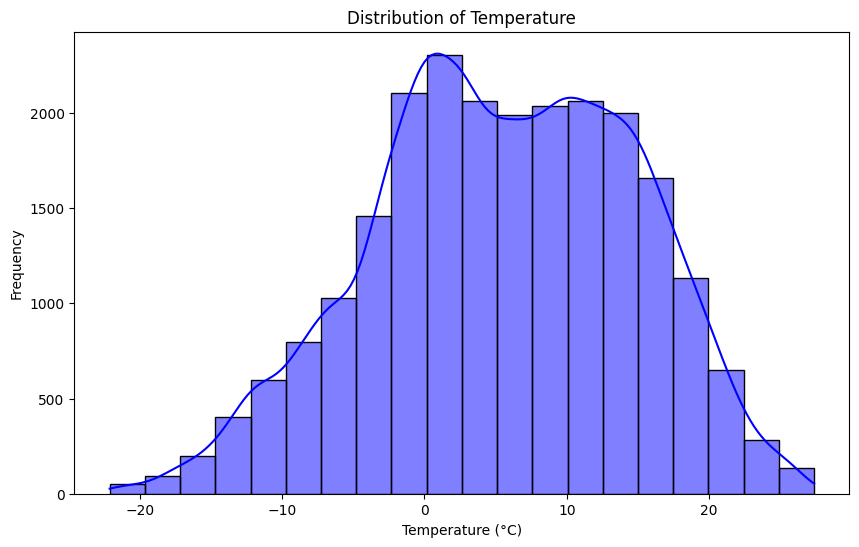

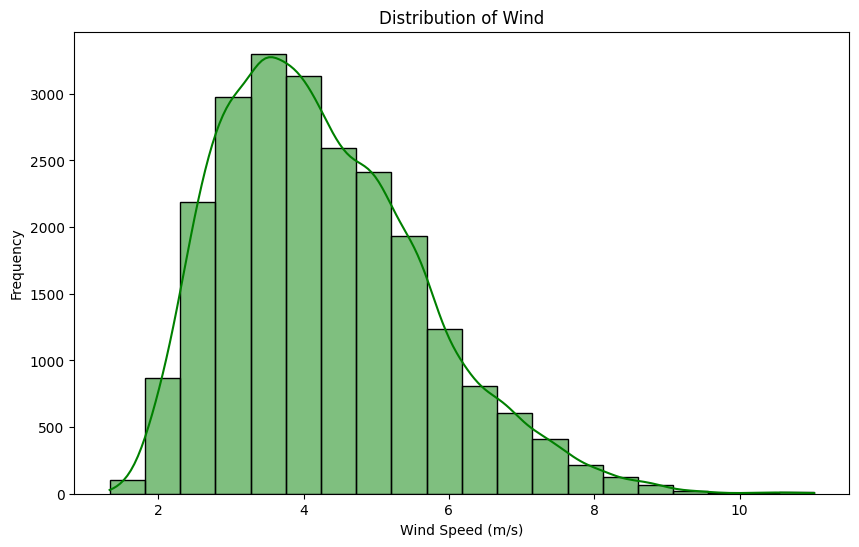

In [2]:
# Create histogram for Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temp'], bins=20, kde=True, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Create histogram for Wind
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind'], bins=20, kde=True, color='green')
plt.title('Distribution of Wind')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

#Explanation of data below: Frequency means how often the temperature has been at what celsius and how windy has it been.
# We can determine that Finland is quite a chilly country but in comparison we do not have heavy winds. This counts hourly rates so we need to cut it down 
# before adding the price calculations and correlations to the mix


C:\Users\rikua\AppData\Local\Temp\ipykernel_16064\4155164479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_2020_data['Time'] = pd.to_datetime(march_2020_data['Time'])


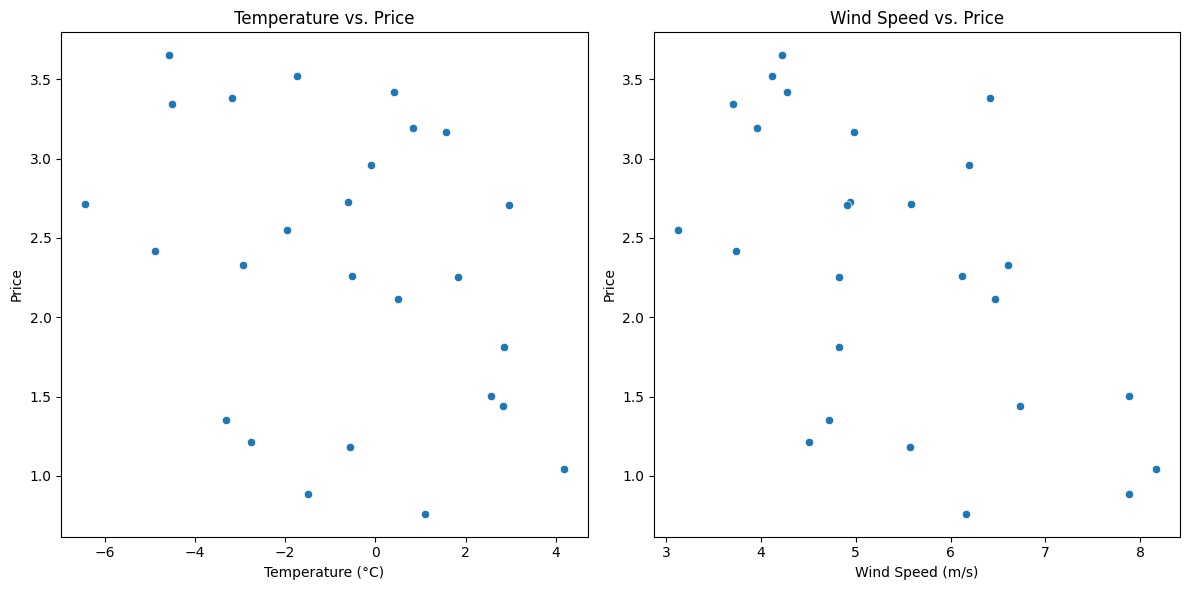

In [3]:
#I use March of 2020 as an example for effects on wind and temperature to price

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for March 2020
march_2020_data = df[(df['Time'] >= '2020-03-01') & (df['Time'] < '2020-04-01')]
# Convert 'Time' column to datetime format

march_2020_data['Time'] = pd.to_datetime(march_2020_data['Time'])
# Calculate daily average wind speed and temperature for March 2020
daily_avg_wind = march_2020_data.groupby(march_2020_data['Time'].dt.date)['Wind'].mean().reset_index()
daily_avg_temp = march_2020_data.groupby(march_2020_data['Time'].dt.date)['Temp'].mean().reset_index()

# Calculate daily average price for March 2020
daily_avg_price = march_2020_data.groupby(march_2020_data['Time'].dt.date)['Price'].mean().reset_index()

# Merge daily average temperature, wind speed, and price data
merged_data = pd.merge(daily_avg_temp, daily_avg_wind, on='Time')
merged_data = pd.merge(merged_data, daily_avg_price, on='Time')

# Visualize the relationships between temperature, wind speed, and price
plt.figure(figsize=(12, 6))

# Scatter plot for temperature vs. price
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_data, x='Temp', y='Price')
plt.title('Temperature vs. Price')
plt.xlabel('Temperature (°C)')
plt.ylabel('Price')

# Scatter plot for wind speed vs. price
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_data, x='Wind', y='Price')
plt.title('Wind Speed vs. Price')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()



In [4]:
# What about the differences in prices between the warmest and coldest month in dataframe?
import pandas as pd
df = pd.read_csv("C:\\Users\\rikua\\fmi_weather_and_price.csv")


df['Time'] = pd.to_datetime(df['Time'])
# Extracting month from the datetime:
df['Month'] = df['Time'].dt.month

# Counting the average temp for each month:
monthly_avg_temp = df.groupby('Month')['Temp'].mean()

# Listing of the warmest and coldest months:
warmest_month = monthly_avg_temp.idxmax()
coldest_month = monthly_avg_temp.idxmin()

# Filtering the months above:
warmest_month_data = df[df['Month'] == warmest_month]
coldest_month_data = df[df['Month'] == coldest_month]

# Get the month and year of the warmest and coldest months
warmest_month_info = warmest_month_data.iloc[0]['Time'].strftime('%B %Y')
coldest_month_info = coldest_month_data.iloc[0]['Time'].strftime('%B %Y')

print("Month and Year of the Warmest Month:", warmest_month_info)
print("Month and Year of the Coldest Month:", coldest_month_info)

# Note that there was a pandemic going on so this dataframe is totally not according to norms. I did some research on the topic 
# And warmer months should have an increase in electricity prices after the temp rises over 22 Celsius. This was not indeed the case in the year of covid (2020) 
# Since many companies were under covid shutdowns and many places were shut down. 
# https://www.fortum.fi/tietoa-meista/forthedoers-blogi/miksi-sahko-niin-paljon-kalliimpaa-kuin-viime-vuonna-ja-onko-silla-valia"
# Also summertime gives the opportunity for some people to use Solar panels. There is a lot of things to concider here.


Month and Year of the Warmest Month: July 2020
Month and Year of the Coldest Month: February 2021


Warmest Month Variance: 146.53408040472988
Warmest Month Standard Deviation: 12.1051262035854
Coldest Month Variance: 30.32172773437018
Coldest Month Standard Deviation: 5.506516842285165


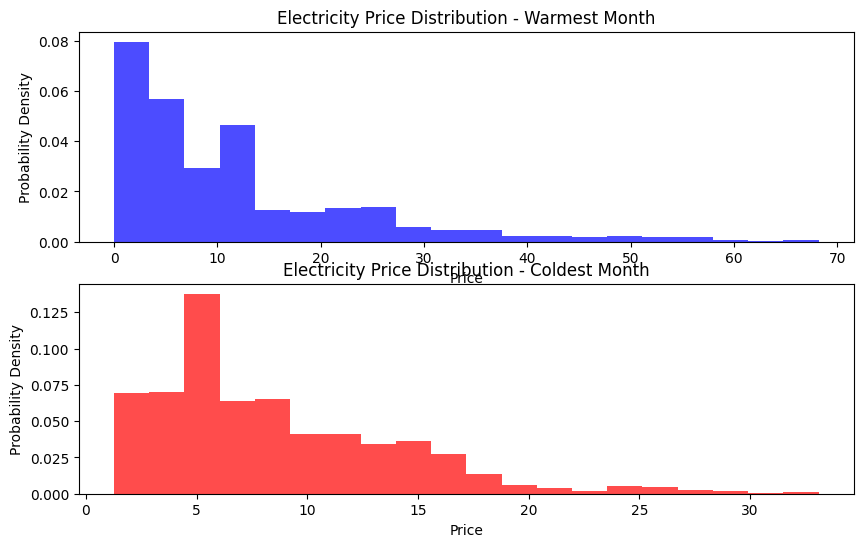

In [5]:
df['Time'] = pd.to_datetime(df['Time'])
df['Month'] = df['Time'].dt.month
monthly_avg_temp = df.groupby('Month')['Temp'].mean()
#Most Warm separation

warmest_month = monthly_avg_temp.idxmax()
warmest_month_data = df[df['Month'] == warmest_month]

#Coldest Separation
coldest_month = monthly_avg_temp.idxmin()
coldest_month_data = df[df['Month'] == coldest_month]

# Calculate variance and standard deviation for electricity prices (Warmest month)
warmest_month_variance = warmest_month_data['Price'].var()
warmest_month_std_dev = warmest_month_data['Price'].std()

# And Coldest

coldest_month_variance = coldest_month_data['Price'].var()
coldest_month_std_dev = coldest_month_data['Price'].std()

# Result printing
print("Warmest Month Variance:", warmest_month_variance)
print("Warmest Month Standard Deviation:", warmest_month_std_dev)

print("Coldest Month Variance:", coldest_month_variance)
print("Coldest Month Standard Deviation:", coldest_month_std_dev)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(warmest_month_data['Price'], bins=20, color='blue', alpha=0.7, density=True)
plt.title('Electricity Price Distribution - Warmest Month')
plt.xlabel('Price')
plt.ylabel('Probability Density')

plt.subplot(2, 1, 2)
plt.hist(coldest_month_data['Price'], bins=20, color='red', alpha=0.7, density=True)
plt.title('Electricity Price Distribution - Coldest Month')
plt.xlabel('Price')
plt.ylabel('Probability Density')


plt.tight_layout
plt.show()

In [6]:

# In conclusion: The warmest month exhibits significantly higher variance and std deviation in prices compared to the coldest months. 
# Prices fluctuate more widely during warmer months. This could be due to many factors such as changes in demand, supply disruptions, pandemic or market dynamics
# influenced by weather conditions

# In contrast, the coldest month shows lower variance and std deviation in electricity prices, indicating relatively greater stability in prices during colder months. 
# This may be attributed to more predicatable demand patterns or increased availability of energy recources during colder periods. 

# Overall, the comparison between the warmest and coldest months in electricity prices underscores the complex interplay of factors
# Such as weather patterns, demand dynamics and market forces in shaping energy prising trends. 
# Also these last few years have been very bad for stable, long time data-analysis due to pandemic and war in European soil. 

# These hypothesis are supported by this article : https://www.drax.com/electrification/some-like-it-hot-how-temperature-affects-electricity-prices/

print("Kiitti ku luit tänne asti :D - Riku Anttila")

Kiitti ku luit tänne asti :D - Riku Anttila
